In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# The link og the dataset : https://www.kaggle.com/datasets/krantiswalke/bankfullcsv
df = pd.read_csv("bank-full.csv")
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
columns_to_encode = ['job', 'marital', 'education', 'month', 'contact', 'poutcome', 'housing', 'loan', 'Target', 'default']
for column_to_encode in columns_to_encode:
    encoder.fit(np.array(df[column_to_encode]))
    df[column_to_encode]=encoder.transform(df[column_to_encode])

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [7]:
colums_have_unknow=['job', 'marital', 'education', 'default', 'housing', 'loan']
for colum_has_unknow in colums_have_unknow:
    df.drop(df[df[colum_has_unknow] == 'unknow'].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  Target     45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [8]:
y = df["Target"].copy()
x = df.drop("Target", axis=1)

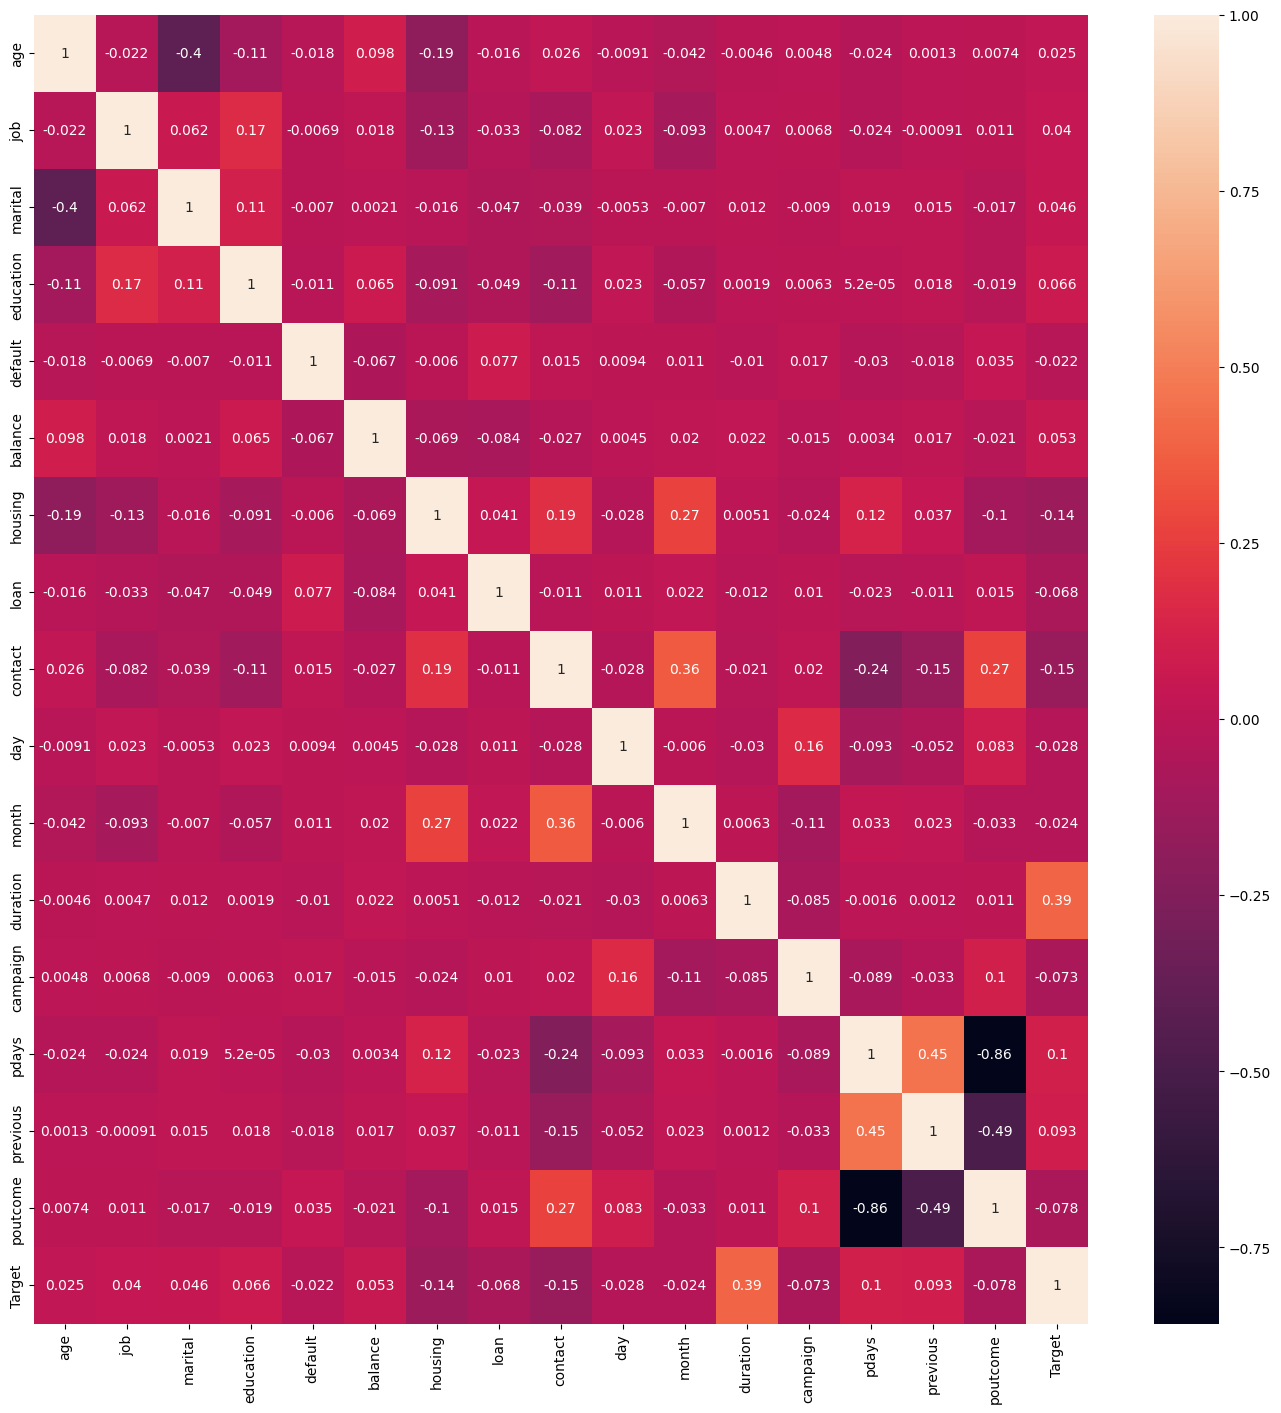

In [9]:
plt.figure(figsize=(17,17))
sns.heatmap(data = df.corr(), annot=True)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

In [11]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

In [12]:
log_clf = LogisticRegression(solver='lbfgs', max_iter=30000)
dt_clf = DecisionTreeClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', dt_clf), ('svc', svm_clf)])
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=30000)),
                             ('rf', DecisionTreeClassifier()), ('svc', SVC())])

In [13]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, dt_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8901474530831099
DecisionTreeClassifier 0.8766085790884719
SVC 0.8828418230563003
VotingClassifier 0.8905495978552279


In [14]:
# soft voting
log_clf = LogisticRegression(solver='lbfgs', max_iter=30000)
dt_clf = DecisionTreeClassifier()
svm_clf = SVC(probability=True)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', dt_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=30000)),
                             ('rf', DecisionTreeClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [15]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, dt_clf, svm_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8901474530831099
DecisionTreeClassifier 0.8741286863270777
SVC 0.8828418230563003
VotingClassifier 0.8921581769436997


In [16]:
#pasting
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, max_samples=400, bootstrap=False, n_jobs=-1)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8960455764075067

In [17]:
#bagging
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, max_samples=400, bootstrap=True, n_jobs=-1)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8963806970509384

In [18]:
#oob
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=2000, max_samples=400, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
bag_clf.oob_score_

0.8981545673632432

In [19]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(x_train, y_train)
y_pred_rf = rnd_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8966487935656836

In [20]:
#Ada boost(SAMME)

from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME", learning_rate=0.5)
ada_clf.fit(x_train, y_train)
y_pred = ada_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8948391420911528

In [21]:
#Ada boost(SAMME.R)

from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(x_train, y_train)
y_pred = ada_clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8989276139410187

In [24]:
# Gradiant boost(manual setup)
from sklearn.tree import DecisionTreeClassifier
tree_cl1 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_cl1.fit(x_train, y_train)

y2 = y_train - tree_cl1.predict(x_train)
tree_cl2 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_cl2.fit(x_train, y2)

y3 = y2 - tree_cl2.predict(x_train)
tree_cl3 = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_cl3.fit(x_train, y3)

y_pred = sum(tree.predict(x_test) for tree in (tree_cl1, tree_cl2, tree_cl3))
accuracy_score(y_test, y_pred)

0.8880026809651475

In [25]:
# Gradiant boost(use sklearn)
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=2, n_estimators=5, random_state=42, learning_rate=1.0)
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
accuracy_score(y_test, y_pred)

0.8939678284182305

In [26]:
# Use early stopping so as to find best n_estimators parameter for GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=2, warm_start = True, random_state=42, learning_rate=1.0)
min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbc.n_estimators = n_estimators
    gbc.fit(x_train, y_train)
    y_pred = gbc.predict(x_test)
    val_error = mean_squared_error(y_test, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break # early stopping
gbc.fit(x_train, y_train)
y_pred = gbc.predict(x_test)
gbc.n_estimators

15

In [27]:
accuracy_score(y_test, y_pred)

0.9000670241286863

In [28]:
#XGBoost
!pip install xgboost

     -------------------------------------- 125.4/125.4 MB 3.8 MB/s eta 0:00:00


In [29]:
from xgboost import XGBClassifier
XG_classifier = XGBClassifier(random_state = 42)
XG_classifier.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [30]:
y_pred = XG_classifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.9070375335120644

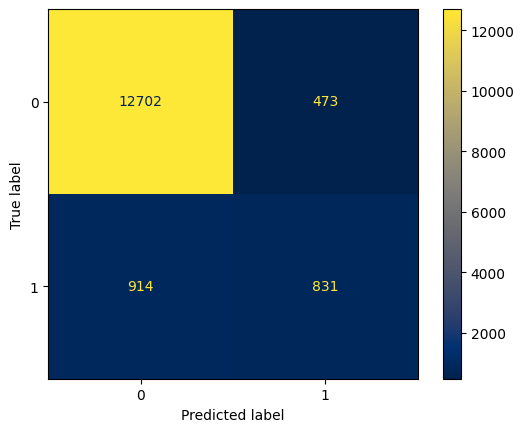

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.cividis)
plt.show()

In [32]:
!pip install catboost

     ---------------------------------------- 73.9/73.9 MB 6.4 MB/s eta 0:00:00
     --------------------------------------- 15.2/15.2 MB 10.6 MB/s eta 0:00:00
     ---------------------------------------- 47.0/47.0 kB 2.3 MB/s eta 0:00:00


In [33]:
from catboost import CatBoostClassifier

cat_features = list(range(0, x.shape[1]))
clf = CatBoostClassifier(iterations=5, learning_rate=0.1)
clf.fit(x_train, y_train, cat_features=cat_features,  verbose=False)
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.8922922252010724

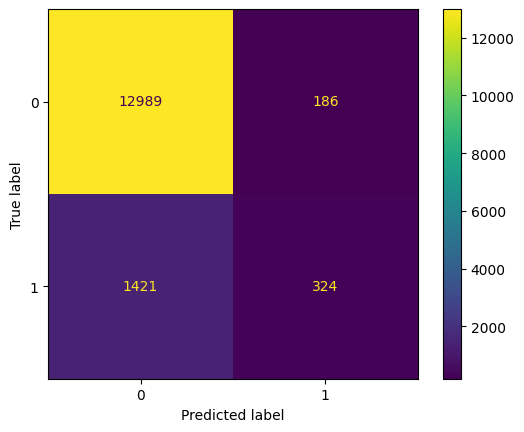

In [34]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()